In [1]:
# sum of squares for error, SSE

import numpy as np

def sum_squares_error(y, t):
    return round(0.5 * np.sum((y - t) ** 2), 5)


In [2]:
# label's value is 2
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]

# 2 is the highest possibility of softmax function
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
print('predict label is 2')
print(f'SSE : {sum_squares_error(np.array(y), np.array(t))}')

# 9 is the highest possibility of softmax function
y = [0.01, 0.02, 0.03, 0.04, 0.02, 0.1, 0.0, 0.0, 0.0, 0.8]
print('\npredict label is 9')
print(f'SSE : {sum_squares_error(np.array(y), np.array(t))}')

predict label is 2
SSE : 0.0975

predict label is 9
SSE : 0.7967


In [3]:
# cross entropy error, CEE
# if y=0 np.log(y) go to -inf so we need to add a little value delta
def cross_entropy_error(y, t):
    delta = 1e-7
    return round(-np.sum(t * np.log(y + delta)), 5)

In [4]:
# cross entropy error, CEE
# label's value is 2
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]

# 2 is the highest possibility of softmax function
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
print('predict label is 2')
print(f'CEE : {cross_entropy_error(np.array(y), np.array(t))}')

# 9 is the highest possibility of softmax function
y = [0.01, 0.02, 0.03, 0.04, 0.02, 0.1, 0.0, 0.0, 0.0, 0.8]
print('\npredict label is 9')
print(f'CEE : {cross_entropy_error(np.array(y), np.array(t))}')

predict label is 2
CEE : 0.51083

predict label is 9
CEE : 3.50655


In [5]:
import sys, os
from dataset.mnist import load_mnist

(x_train, t_train), (X_test, t_test) = load_mnist(normalize= True, one_hot_label= True)

print(x_train.shape)
print(t_train.shape)

(60000, 784)
(60000, 10)


In [6]:
# make 10 random dataset
train_size = x_train.shape[0]
batch_size = 10
batch_mask = np.random.choice(train_size, batch_size)
x_batch = x_train[batch_mask]
t_batch = t_train[batch_mask]

np.random.choice(60000,10)

array([52081, 21557, 59715, 15791, 52884,  1194, 24795, 18149, 32239,
        6800])

In [7]:
# cross_entropy_error for batch
# this code is label(one-hot-encoding)
def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)

        batch_size = y.shape[0]
        return -np.sum(t * np.log(y + 1e-07)) / batch_size

In [8]:
# we use loss function then accuracy, why we do not use accuracy?
# Loss functions are typically differentiable.
# which allows for the use of optimization algorithms like gradient descent to update the model parameters. 
# accuracy is not differentiable as it measures discrete

In [9]:
# implement differential
def bad_numerical_diff(f, x):
    h = 1e-50
    return (f(x + h) -f(x))/h

# 1e-50 makes roundging error
print(np.float32(1e-50))

def good_numerical_diff(f,x):
    h = 1e-4
    return (f(x + h) - f(x - h)) / (2 * h)

0.0


In [10]:
import numpy as np
import matplotlib.pyplot as plt

# numerical differential example
def function_1(x):
    return 0.01 * x ** 2  + 0.1 * x

x = np.arange(0.0, 20.0, 0.1)
y = function_1(x)

print('bad_numerical_diff')
print(bad_numerical_diff(function_1, 5))
print(bad_numerical_diff(function_1, 10))
print()

print('good_numerical_diff')
print(good_numerical_diff(function_1, 5))
print(good_numerical_diff(function_1, 10))

bad_numerical_diff
0.0
0.0

good_numerical_diff
0.1999999999990898
0.2999999999986347


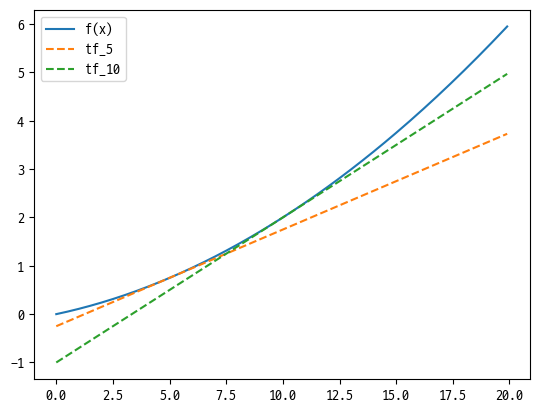

In [11]:
def tangent_line(f, x):
    d = good_numerical_diff(f, x)
    y = f(x) - d*x
    return lambda t: d*t + y

tf_5 = tangent_line(function_1, 5)
tf_10 = tangent_line(function_1, 10)
y2 = tf_5(x)
y3 = tf_10(x)

plt.plot(x, y)
plt.plot(x, y2, linestyle='--')
plt.plot(x, y3, linestyle='--')
plt.legend(['f(x)', 'tf_5', 'tf_10']);

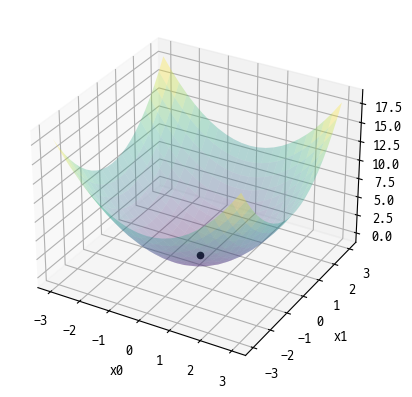

In [12]:
# x0^2 + x1^2 graph
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def f(x0, x1):
    return x0**2 + x1**2

# make data
x0 = np.linspace(3, -3, 23)
x1 = np.linspace(3, -3, 23)
x0, x1 = np.meshgrid(x0, x1)
y = f(x0, x1)

# generate 3D graph
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x0, x1, y, cmap = 'viridis', alpha = 0.3)

# x0=0, x1=0 black color point
ax.scatter(0, 0, f(0, 0), color='black', label='Point (0, 0)')

ax.set_xlabel('x0')
ax.set_ylabel('x1');

In [13]:
# partial derivative example
def function_2(x):
    return x[0]**2 + x[1] ** 2

# x0 = 3, x1 = 4 partial derivative to x0
def function_tmp1(x0):
    return x0 * x0 + 4.0 **2

good_numerical_diff(function_tmp1, 3.0)

6.00000000000378

In [14]:
# x0 = 3, x1 = 4 partial derivative to x1
def function_tmp2(x1):
    return 3.0 ** 2.0 + x1 * x1

good_numerical_diff(function_tmp2, 4.0)

7.999999999999119

In [15]:
# gradient

def numerical_gradient(f, x):
    h = 1e-4
    grad = np.zeros_like(x)

    for idx in range(x.size):
        tmp_val = x[idx]
        x[idx] = tmp_val + h
        fxh1 = f(x)

        x[idx] = tmp_val - h
        fxh2 = f(x)

        grad[idx] = (fxh1 - fxh2) / (2*h)
        x[idx] = tmp_val
    
    return grad

In [16]:
print(numerical_gradient(function_2, np.array([3.0, 4.0])))
print(numerical_gradient(function_2, np.array([0.0, 2.0])))
print(numerical_gradient(function_2, np.array([3.0, 0.0])))

[6. 8.]
[0. 4.]
[6. 0.]


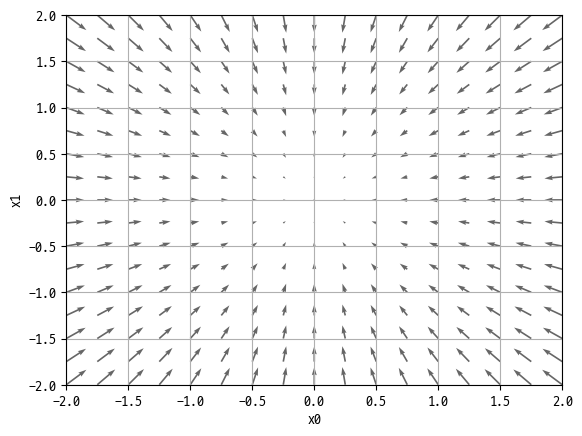

In [17]:
# x0^2 + x1^2 gradient

import numpy as np
import matplotlib.pylab as plt
from mpl_toolkits.mplot3d import Axes3D

def _numerical_gradient_no_batch(f, x):
    h = 1e-4
    grad = np.zeros_like(x)
    
    for idx in range(x.size):
        tmp_val = x[idx]
        
        x[idx] = float(tmp_val) + h
        fxh1 = f(x)
        
        x[idx] = tmp_val - h 
        fxh2 = f(x) 
        
        grad[idx] = (fxh1 - fxh2) / (2*h)
        x[idx] = tmp_val
        
    return grad


def numerical_gradient(f, X):
    if X.ndim == 1:
        return _numerical_gradient_no_batch(f, X)
    else:
        grad = np.zeros_like(X)
        
        for idx, x in enumerate(X):
            grad[idx] = _numerical_gradient_no_batch(f, x)
        
        return grad


def function_2(x):
    if x.ndim == 1:
        return np.sum(x**2)
    else:
        return np.sum(x**2, axis=1)


def tangent_line(f, x):
    d = numerical_gradient(f, x)
    print(d)
    y = f(x) - d*x
    return lambda t: d*t + y


x0 = np.arange(-2, 2.5, 0.25)
x1 = np.arange(-2, 2.5, 0.25)
X, Y = np.meshgrid(x0, x1)

X = X.flatten()
Y = Y.flatten()

grad = numerical_gradient(function_2, np.array([X, Y]) )

plt.figure()
plt.quiver(X, Y, -grad[0], -grad[1],  angles="xy",color="#666666")
plt.xlim([-2, 2])
plt.ylim([-2, 2])
plt.xlabel('x0')
plt.ylabel('x1')
plt.grid()
ax.legend()
plt.draw()
plt.show()

In [18]:
# gradient descent method
def gradient_descent(f, init_x, lr = 0.01, step_num = 100):
    x = init_x

    for i in range(step_num):
        grad = numerical_gradient(f, x)
        x -= lr * grad
    return x

In [19]:
def function_2(x):
    return x[0]**2 + x[1]**2

init_x = np.array([-3.0, 4.0])
gradient_descent(function_2, init_x = init_x, lr=0.1, step_num=100)

array([-6.11110793e-10,  8.14814391e-10])

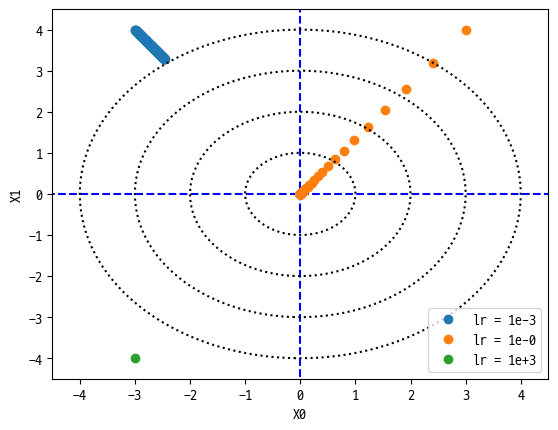

In [20]:
import numpy as np
import matplotlib.pylab as plt
from gradient_2d import numerical_gradient

def gradient_descent(f, init_x, lr=0.01, step_num=100):
    x = init_x
    x_history = []

    for i in range(step_num):
        x_history.append( x.copy() )

        grad = numerical_gradient(f, x)
        x -= lr * grad

    return x, np.array(x_history)

def function_2(x):
    return x[0]**2 + x[1]**2

# init point
init_x1 = np.array([-3.0, 4.0])    
init_x2 = np.array([3.0, 4.0])    
init_x3 = np.array([-3.0, -4.0])    

# three different learning rates
x_1, x1_history = gradient_descent(function_2, init_x1, lr=1e-3)
x_2, x2_history = gradient_descent(function_2, init_x2, lr=1e-1)
x_3, x3_history = gradient_descent(function_2, init_x3, lr=1e+3)

# make Contour Plot of f(x) = x0² + x1²
plt.plot([-5, 5], [0, 0], '--b', label='')
plt.plot([0, 0], [-5, 5], '--b', label='')
plt.plot(x1_history[:, 0], x1_history[:, 1], 'o', label='lr = 1e-3')
plt.plot(x2_history[:, 0], x2_history[:, 1], 'o', label='lr = 1e-0')
plt.plot(x3_history[:, 0], x3_history[:, 1], 'o', label='lr = 1e+3')

x0 = np.linspace(-5, 5, 1000)
x1 = np.linspace(-5, 5, 1000)
x0, x1 = np.meshgrid(x0, x1)
y = x0 ** 2 + x1 ** 2

plt.contour(x0, x1, y, levels=[1, 4, 9, 16], colors='k', linestyles='dotted')

plt.xlim(-4.5, 4.5)
plt.ylim(-4.5, 4.5)
plt.xlabel("X0")
plt.ylabel("X1")
plt.legend()
plt.show()

In [21]:
import sys, os
sys.path.append(os.pardir)
import numpy as np
from common.functions import softmax, cross_entropy_error
from common.gradient import numerical_gradient

class simpleNet:
    def __init__(self):
        self.W = np.random.randn(2,3)

    def predict(self, x):
        return np.dot(x, self.W)

    def loss(self, x, t):
        z = self.predict(x)
        y = softmax(z)
        loss = cross_entropy_error(y, t)

        return loss

In [22]:
# test simpleNet
net = simpleNet()
print("Weights")
print(f'{net.W}\n')


x = np.array([0.6, 0.9])
p = net.predict(x)
print("Prediction")
print(f'{p}\n')

# answer label
t = np.array([0, 0, 1])
print("net loss")
print(net.loss(x, t))

Weights
[[ 0.01744905 -0.43895897  0.34499857]
 [ 0.0714699   1.16791861 -0.98234905]]

Prediction
[ 0.07479234  0.78775137 -0.677115  ]

net loss
2.00794569621605


In [23]:
# numerical gradient of simpleNet
def f(W):
    return net.loss(x, t)

dW = numerical_gradient(f, net.W)
print(dW)

[[ 0.17086774  0.34857341 -0.51944115]
 [ 0.25630161  0.52286011 -0.77916172]]


In [24]:
# implement training alogorithm
# SGD stochastic gradient descent
import sys, os
sys.path.append(os.pardir)  
from common.functions import *
from common.gradient import numerical_gradient

class TwoLayerNet:
    def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):
        # initialize weights
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)

    def predict(self, x):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
    
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)
        
        return y
        
    # x : input data, y : answer labels
    def loss(self, x, t):
        y = self.predict(x)

        return cross_entropy_error(y, t)

    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        t = np.argmax(t, axis=1)

        accuracy = np.sum(y == t) / float(x.shape[0])
        return accuracy

    # x : input data, y : answer labels
    def numerical_gradient(self, x, t):
        loss_W = lambda W: self.loss(x, t)

        grads = {}
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])

        return grads

In [25]:
# class test
net = TwoLayerNet(input_size=784, hidden_size=100, output_size=10)
print(net.params['W1'].shape)  # (784, 100)
print(net.params['b1'].shape)  # (100,)
print(net.params['W2'].shape)  # (100, 10)
print(net.params['b2'].shape)  # (10,)

x = np.random.rand(100, 784)  # dummy input data
t = np.random.rand(100, 10)   # dummy label data

grads = net.numerical_gradient(x, t)  # calculate gradient
print(grads['W1'].shape)  # (784, 100)
print(grads['b1'].shape)  # (100,)
print(grads['W2'].shape)  # (100, 10)
print(grads['b2'].shape)  # (10,)

(784, 100)
(100,)
(100, 10)
(10,)
(784, 100)
(100,)
(100, 10)
(10,)


In [26]:
import numpy as np
from dataset.mnist import load_mnist

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=False)

train_loss_list = []

# hyper parameters
iters_num = 30  
train_size = x_train.shape[0]
batch_size = 10  
learning_rate = 0.1

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

for i in range(iters_num):
    # making mini batch
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    # calculating gradient
    grad = network.numerical_gradient(x_batch, t_batch)
    # grad = network.gradient(x_batch, t_batch) # high speed version chp5

    # update weights
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]

    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)

In [27]:
%%time

import numpy as np
from dataset.mnist import load_mnist

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

# hyper parameters
iters_num = 200  
train_size = x_train.shape[0]
batch_size = 10  
learning_rate = 0.1

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1)

for i in range(iters_num):
    # making mini batch
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    # calculating gradient
    grad = network.numerical_gradient(x_batch, t_batch)
    # grad = network.gradient(x_batch, t_batch) # high speed version chp5

    # update weights
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]

    # recording learning process
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)

    # calculating accuracy per epoch
    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print("train acc, test acc | "
              + str(train_acc) + ", " + str(test_acc))

train acc, test acc | 0.11236666666666667, 0.1135


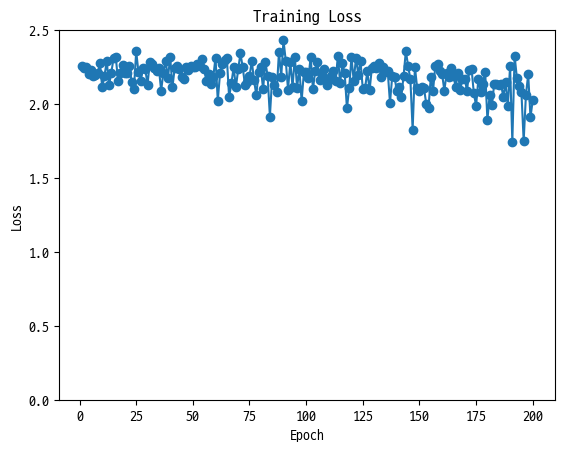

In [28]:
# Generate x-axis values (epochs)
epochs = range(1, len(train_loss_list) + 1)

# Plot the line chart
plt.plot(epochs, train_loss_list, marker='o')

# Set chart title and axis labels
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')

# Display the chart
plt.ylim(0, 2.5);